In [105]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import ast
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from collections import Counter
import scipy.stats as stats

In [106]:
Movie = pd.read_csv('movie_collection_data_revenuedesc.csv',na_filter=True, na_values=['[]','NaN'])
Movie.head()

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage
0,Doo,True,NaN,3000000,0.600,0.0,0,Doo takes Manhattan,NaN,540000000000,NaN,300.0,en,NaN,NaN,['ba']
1,Avengers: Endgame,False,"['Adventure', 'Science Fiction', 'Action']",356000000,282.089,8.3,17876,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2797800564,2019-04-24,181.0,en,['Marvel Studios'],['US'],"['en', 'ja', 'xh']"
2,Avatar,False,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000,111.199,7.5,23230,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2787965087,2009-12-10,162.0,en,"['Dune Entertainment', 'Lightstorm Entertainme...","['US', 'GB']","['en', 'es']"
3,Titanic,False,"['Drama', 'Romance']",200000000,90.133,7.9,19032,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2187463944,1997-11-18,194.0,en,"['Paramount', 'Lightstorm Entertainment', '20t...",['US'],"['en', 'fr', 'de', 'sv', 'it', 'ru']"
4,Star Wars: The Force Awakens,False,"['Action', 'Adventure', 'Science Fiction', 'Fa...",245000000,58.173,7.4,15704,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2068223624,2015-12-15,136.0,en,"['Lucasfilm Ltd.', 'Bad Robot']",['US'],['en']


# Dropping invalid Data

In [107]:
## Drop INVALID DATA
Numericlist = ['Budget','Popularity','VoteAvg','VoteCount','Revenue','Runtime']
for item in Numericlist:
    Movie[str(item)] = pd.to_numeric(Movie[str(item)], errors='coerce').fillna(0)
Movie_CleanedData = Movie.dropna(subset=['ReleaseDate','SpokenLanguage','ProductionCompany','ProductionCountry','GenreList'])
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Budget']<281)]
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Revenue']==0)]
Movie_CleanedData.drop_duplicates(subset="Movie_name", inplace =True)
Movie_CleanedData.index = pd.RangeIndex(len(Movie_CleanedData.index))
Movie_CleanedData.index = range(len(Movie_CleanedData.index))



## Calculate and Insert Profit Variable

In [108]:
Profit=[]
for i in range(len(Movie_CleanedData)):
    Profit.append(Movie_CleanedData.loc[i,'Revenue']-Movie_CleanedData.loc[i,'Budget'])
Movie_CleanedData.insert(10,"Profit",Profit,True)

## Create new column for release year and month

In [109]:
Movie_CleanedData['Year'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).year
Movie_CleanedData['Month'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).month

In [110]:
#change string in list format to list
for i in range(len(Movie_CleanedData)):
    x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
    Movie_CleanedData.at[i,'GenreList'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCompany'])
    Movie_CleanedData.at[i,'ProductionCompany'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCountry'])
    Movie_CleanedData.at[i,'ProductionCountry'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'SpokenLanguage'])
    Movie_CleanedData.at[i,'SpokenLanguage'] = x

## EXPLORATORY ANALYSIS

## Numeric Data

In [111]:
Q1 = np.quantile(Movie_CleanedData.VoteCount, 0.25)
mean = Movie_CleanedData.VoteCount.mean()
mean_Avg = Movie_CleanedData.VoteAvg.mean()

for i in range(len(Movie_CleanedData)):
    if Movie_CleanedData.VoteCount[i]<Q1:
        Movie_CleanedData.at[i,'VoteCount'] = mean
        Movie_CleanedData.at[i,'mean_Avg']= mean_Avg
        


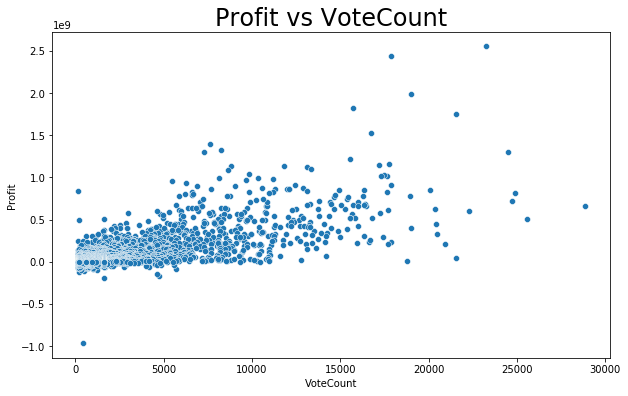

In [112]:
#Plotting VoteCount versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Profit vs VoteCount", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteCount", y="Profit")

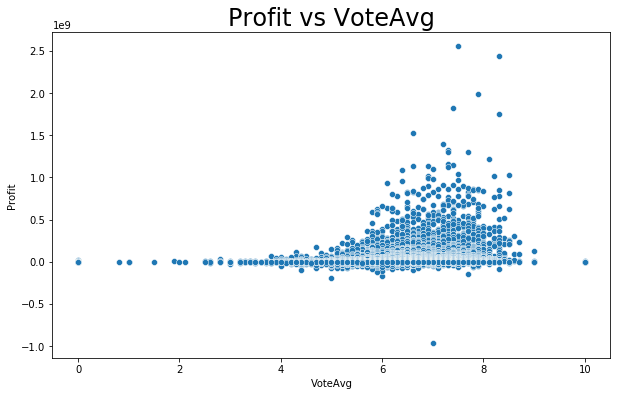

In [113]:
#Plotting VoteAvg versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Profit vs VoteAvg", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteAvg", y="Profit")

In [114]:
NumericData =pd.DataFrame(Movie_CleanedData[['Budget','Popularity','VoteAvg','VoteCount','Revenue','Profit','Runtime','Year','Month']])
NumericData.head()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
0,356000000,282.089,8.3,17876,2797800564,2441800564,181.0,2019,4
1,237000000,111.199,7.5,23230,2787965087,2550965087,162.0,2009,12
2,200000000,90.133,7.9,19032,2187463944,1987463944,194.0,1997,11
3,245000000,58.173,7.4,15704,2068223624,1823223624,136.0,2015,12
4,300000000,320.103,8.3,21555,2046239637,1746239637,149.0,2018,4


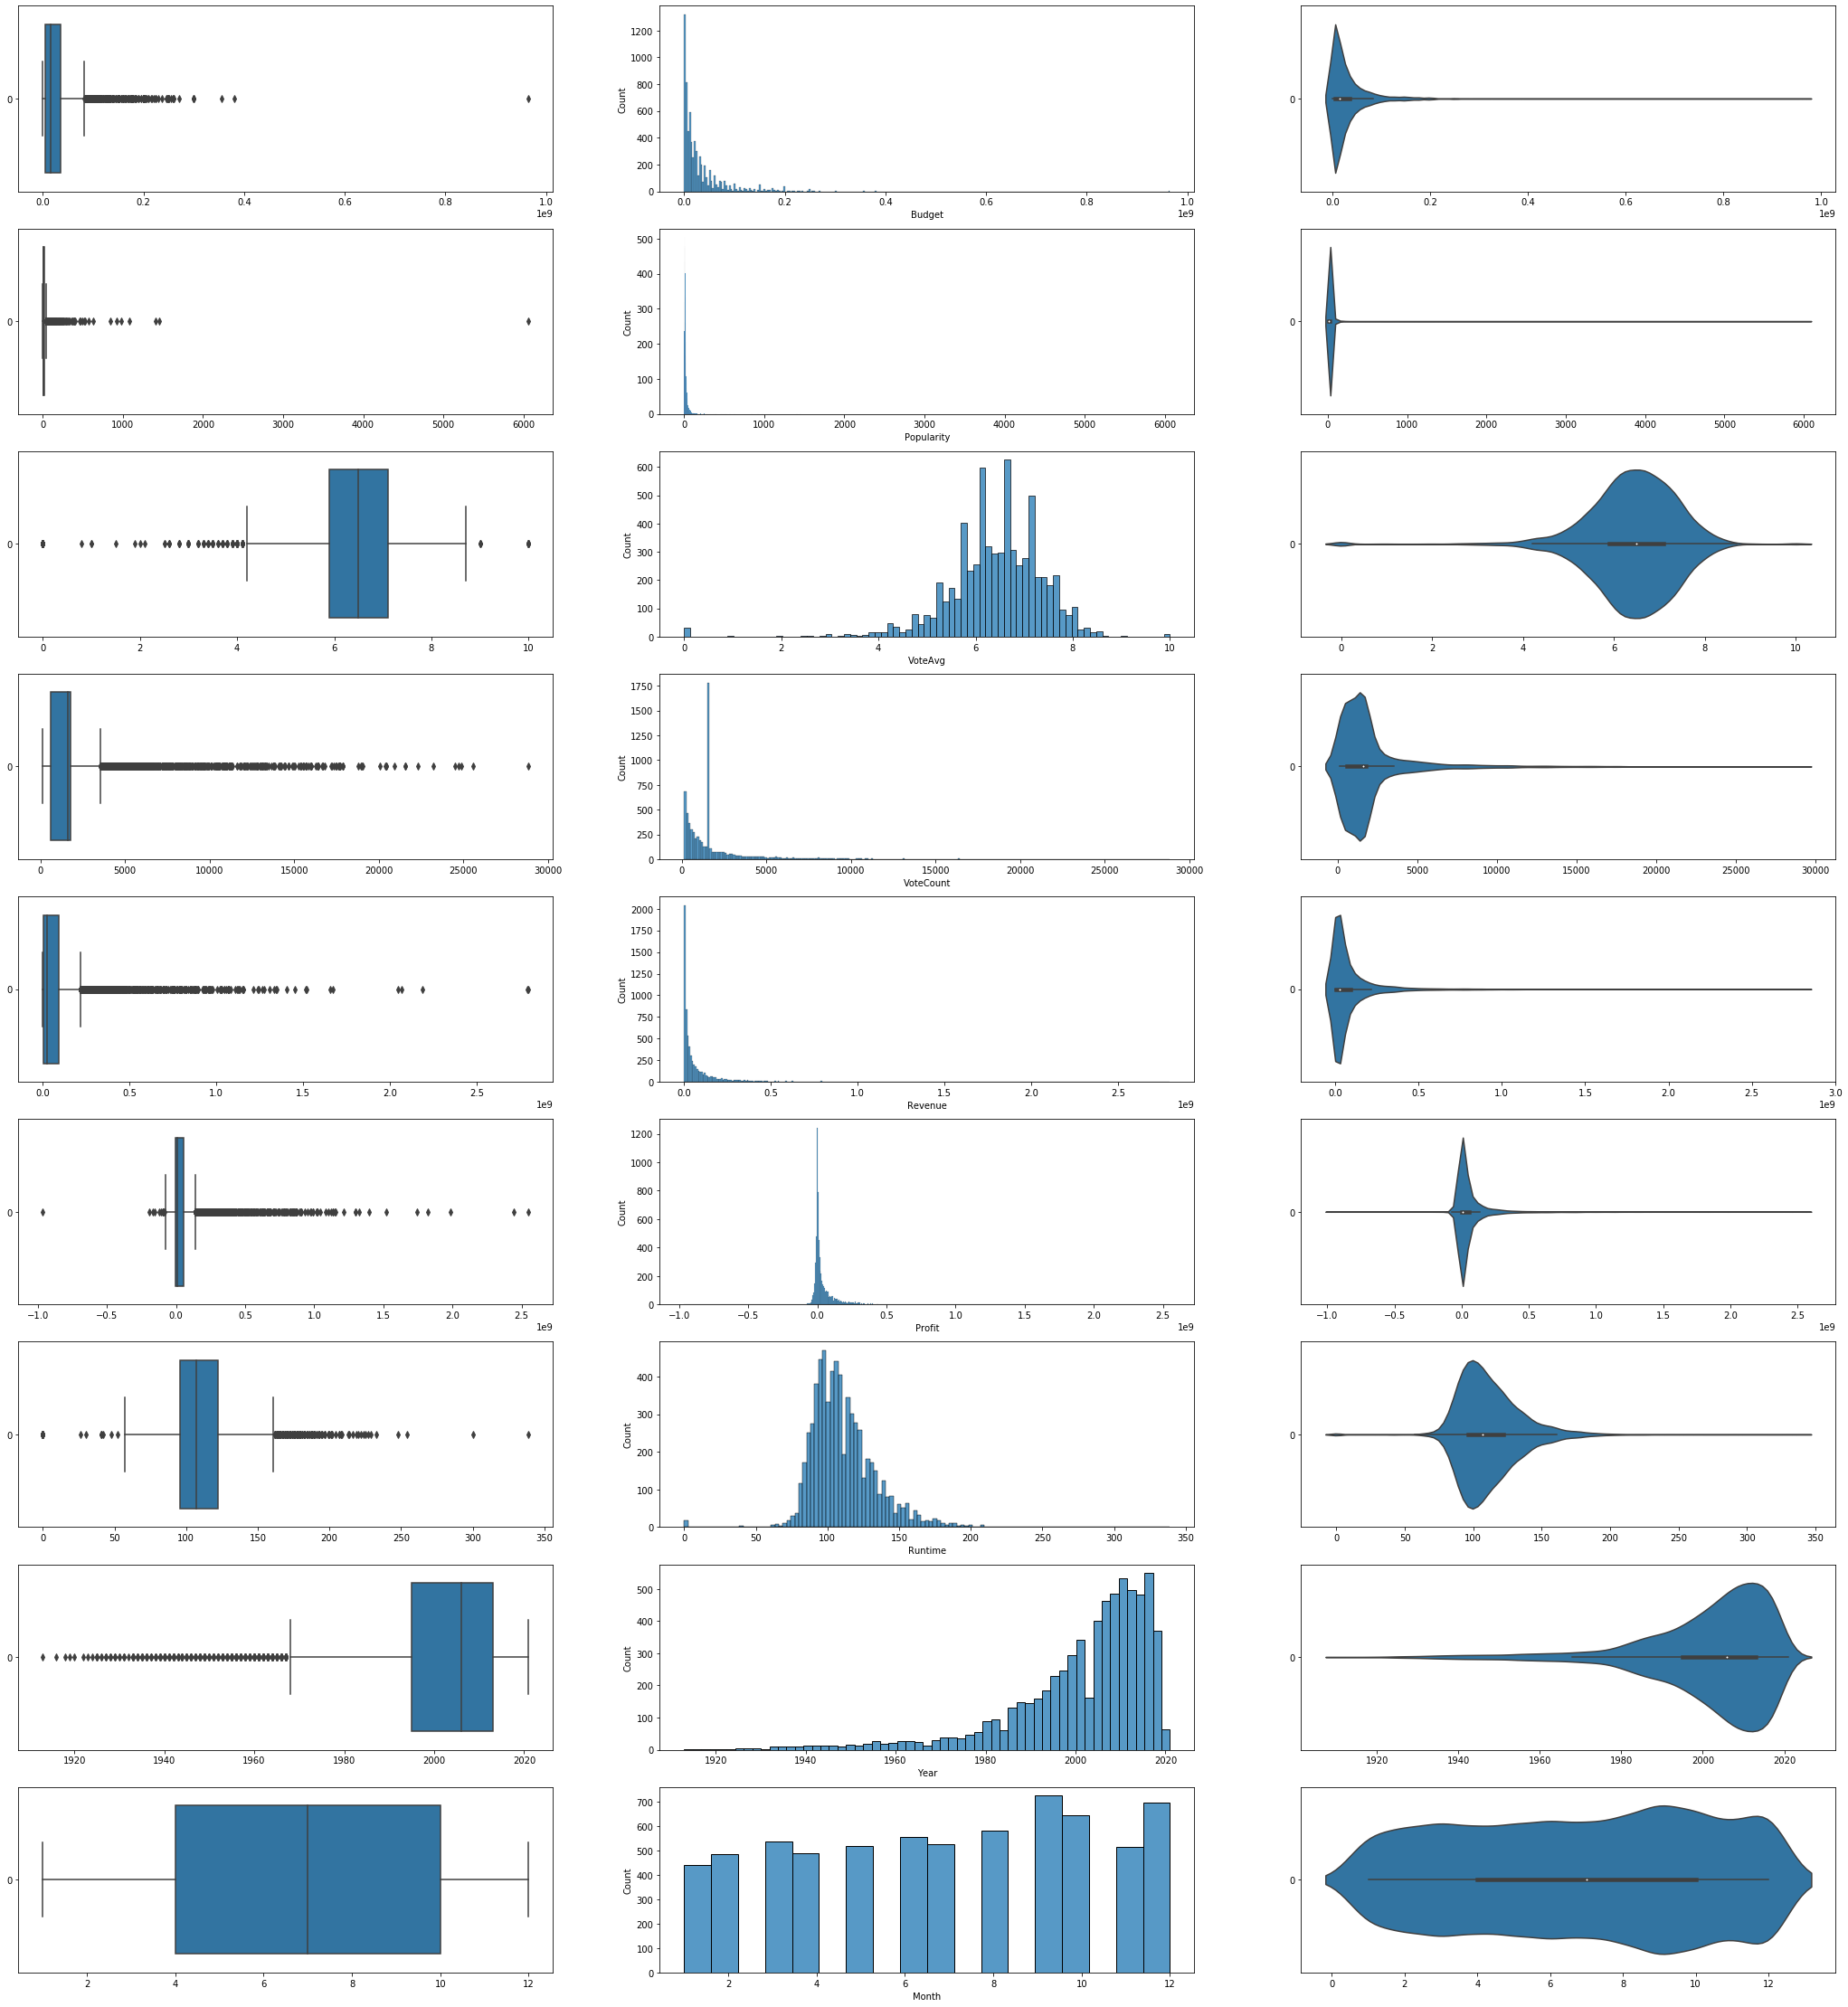

In [115]:
f, axes = plt.subplots(9, 3, figsize=(36, 40))

count = 0
for var in NumericData:
    sb.boxplot(data = NumericData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumericData[var], ax = axes[count,1])
    sb.violinplot(data = NumericData[var], orient = "h", ax = axes[count,2])
    count += 1

              Budget  Popularity   VoteAvg  VoteCount   Revenue    Profit  \
Budget      1.000000    0.196472  0.062778   0.516447  0.708789  0.551146   
Popularity  0.196472    1.000000  0.083846   0.161098  0.181020  0.157684   
VoteAvg     0.062778    0.083846  1.000000   0.273685  0.188434  0.204857   
VoteCount   0.516447    0.161098  0.273685   1.000000  0.739157  0.725966   
Revenue     0.708789    0.181020  0.188434   0.739157  1.000000  0.979255   
Profit      0.551146    0.157684  0.204857   0.725966  0.979255  1.000000   
Runtime     0.135163    0.013692  0.267079   0.180166  0.154626  0.144074   
Year        0.219788    0.092380 -0.096429   0.137734  0.151690  0.116294   
Month       0.032337   -0.004569  0.098205   0.027228  0.032491  0.029143   

             Runtime      Year     Month  
Budget      0.135163  0.219788  0.032337  
Popularity  0.013692  0.092380 -0.004569  
VoteAvg     0.267079 -0.096429  0.098205  
VoteCount   0.180166  0.137734  0.027228  
Revenue     0.

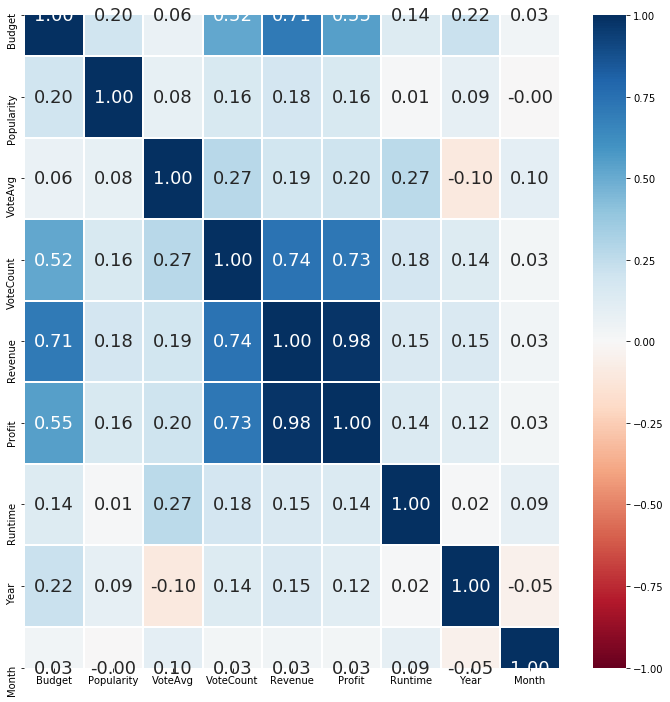

In [116]:

# Correlation Matrix
print(NumericData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(NumericData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

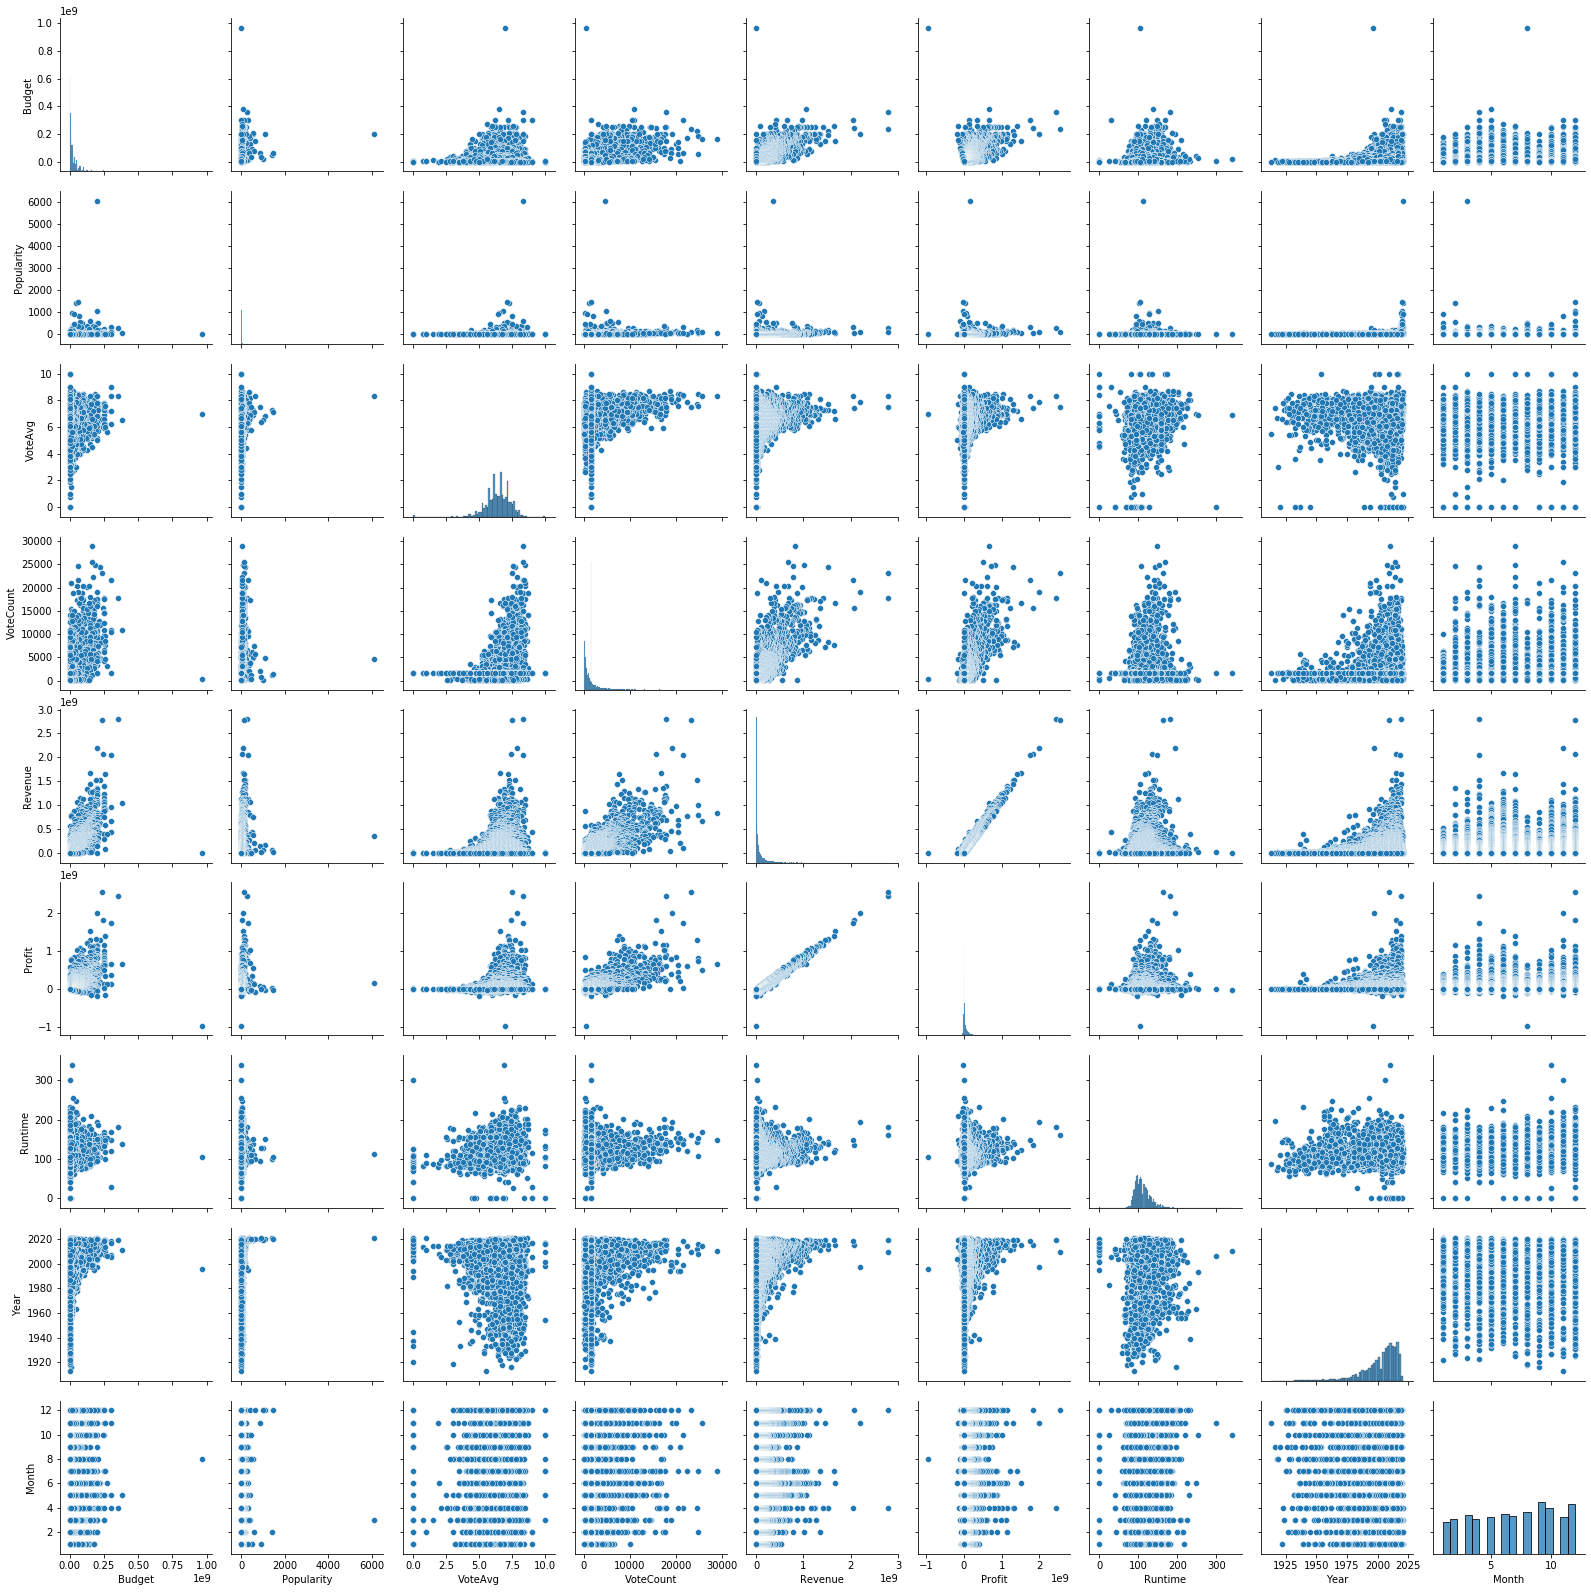

In [117]:
sb.pairplot(data = NumericData)

## Categorical Data

## Month Analysis

## Genre Analysis

In [118]:
Genre = Movie_CleanedData.set_index('Movie_name').GenreList.apply(pd.Series).stack()
Genre = pd.get_dummies(Genre).groupby(level=0).sum()
Genre = Genre.replace(0,np.nan)
Movie_CleanedData = Movie_CleanedData.set_index('Movie_name')
Genre['Profit'] = Movie_CleanedData.Profit
Genre['Year'] = Movie_CleanedData.Year

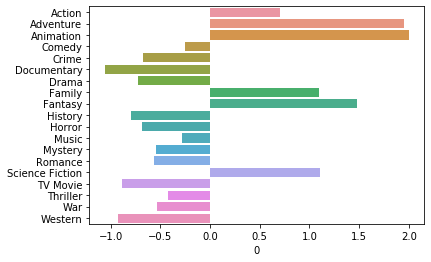

In [87]:
# Calculate Z-Score for each Genre's mean  [the std dev from mean of profit]
meandf = pd.DataFrame(columns=Genre.columns.tolist())
meandf = meandf.drop(columns=['Year','Profit'])

means  = []
for genre in Genre:
    if genre == 'Profit' or genre == 'Year':
        continue
    mean = Genre.loc[Genre[genre] == 1].Profit.mean()
    means.append(mean)

meandf.loc[0] = stats.zscore(means)

ax = sb.barplot(x=meandf.loc[0],y=meandf.columns)

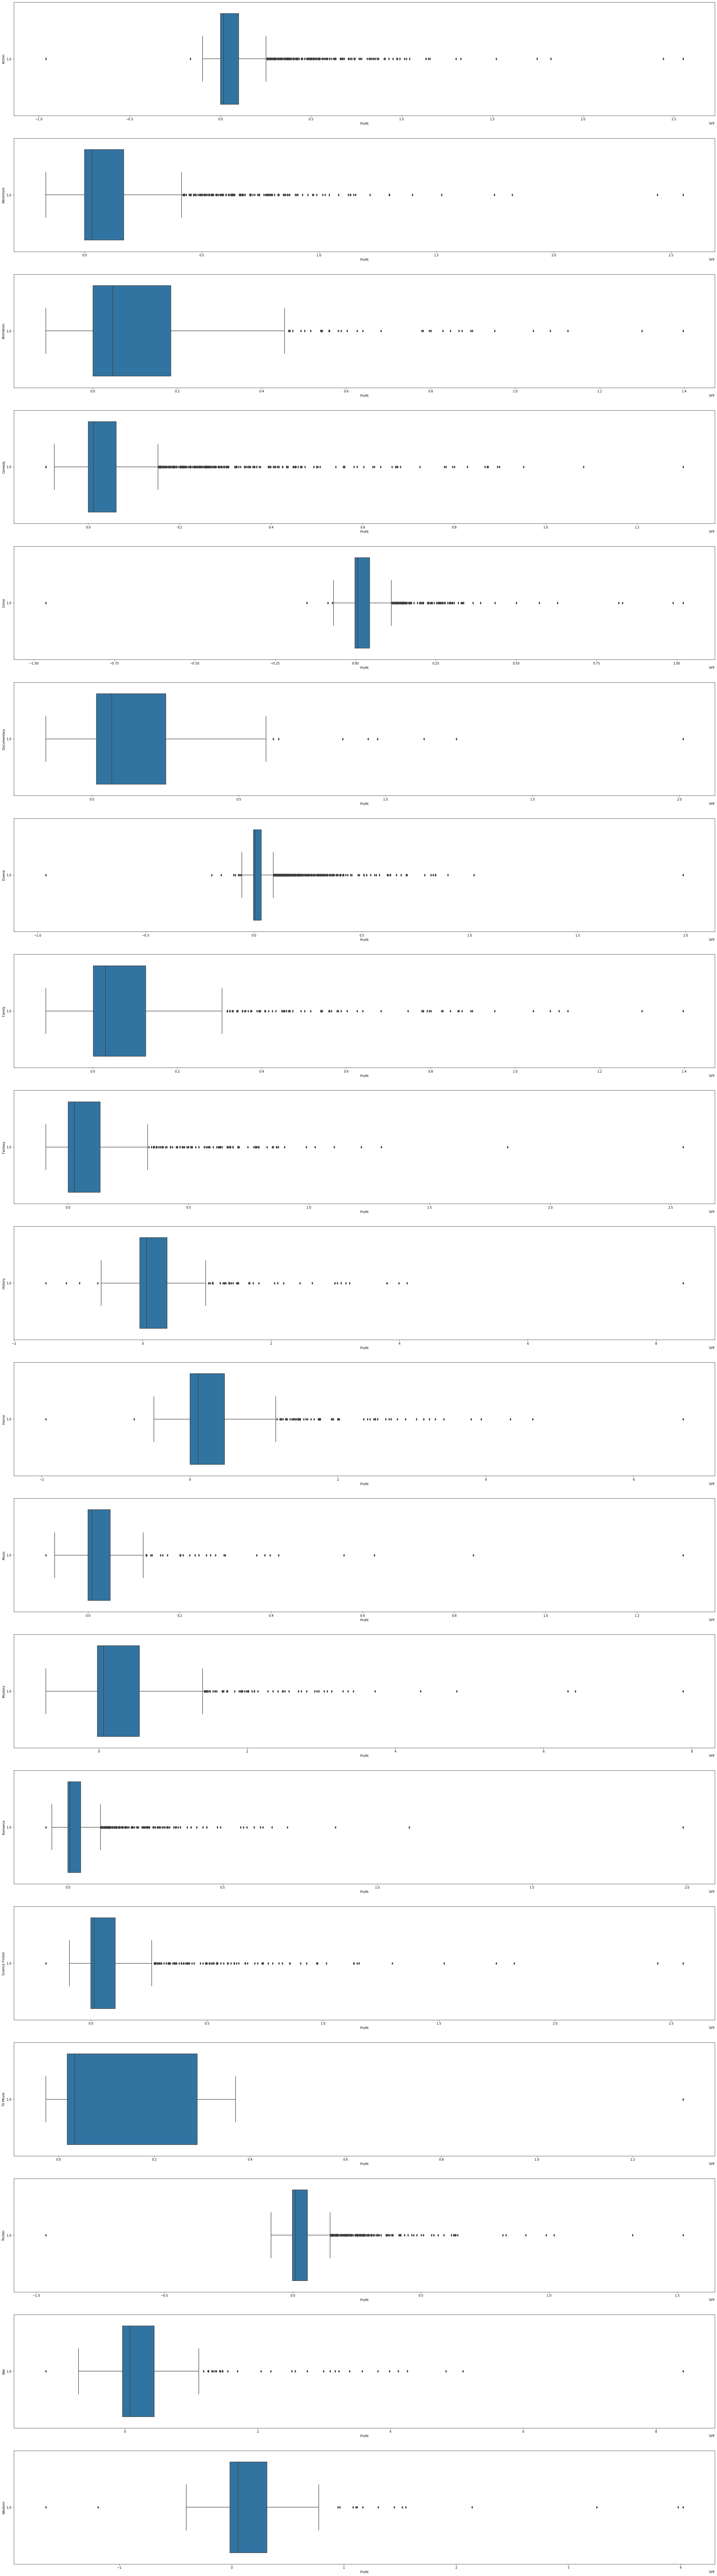

In [16]:
f, axes = plt.subplots(len(Genre.columns)-2, 1, figsize=(40, 150))
count = 0
for var in Genre.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = Genre[var], x = Genre['Profit'], orient = "h", ax = axes[count])
    count+=1


In [168]:
Genre2 = Genre.copy()
Genre2 = Genre2.reset_index(drop=True)
for genre in Genre:
    if genre == 'Profit' or genre == 'Year' or genre == 'Index':
        continue
    for i in range(len(Genre)):
        if Genre[genre][i]==1:
            Genre2.at[i,genre] = Genre.Profit[i]
        else:
            Genre2.at[i,genre] = 0
Genre2 = Genre2.drop(columns=['Year','Profit'])
# Genre

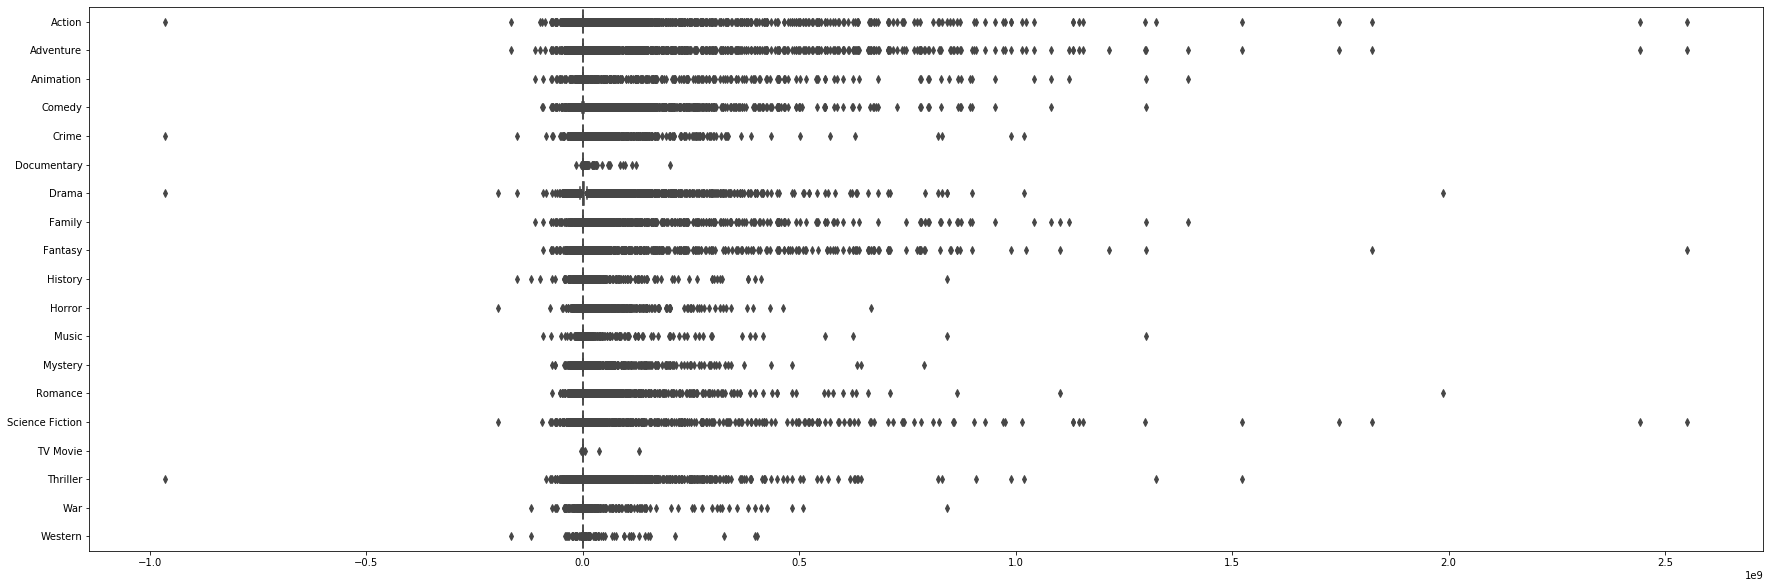

In [169]:
f = plt.figure(figsize=(30, 10))
sb.boxplot(data = Genre2, orient = "h")

In [17]:
df = Genre.melt(id_vars=['Year',"Profit"], var_name="Genre",value_name="Value")
df = df.dropna()
df = df.sample(frac=0.25,axis='rows')

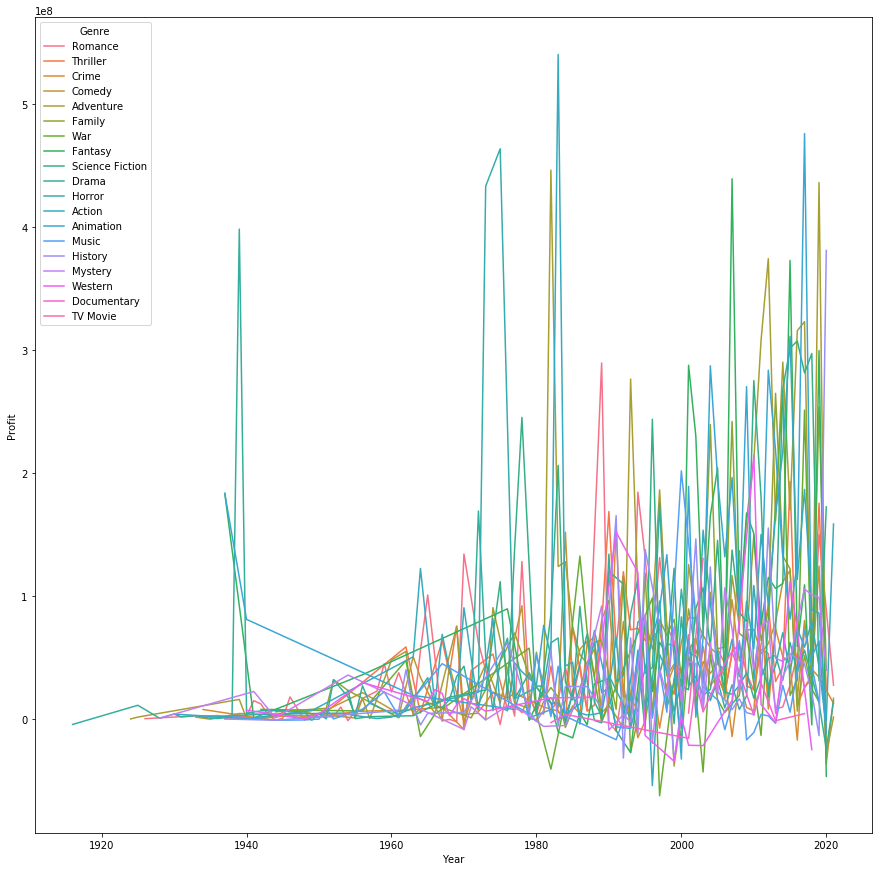

In [18]:
plt.figure(figsize=(15,15))
sb.lineplot(data=df,x='Year',y='Profit',hue='Genre',ci=None)

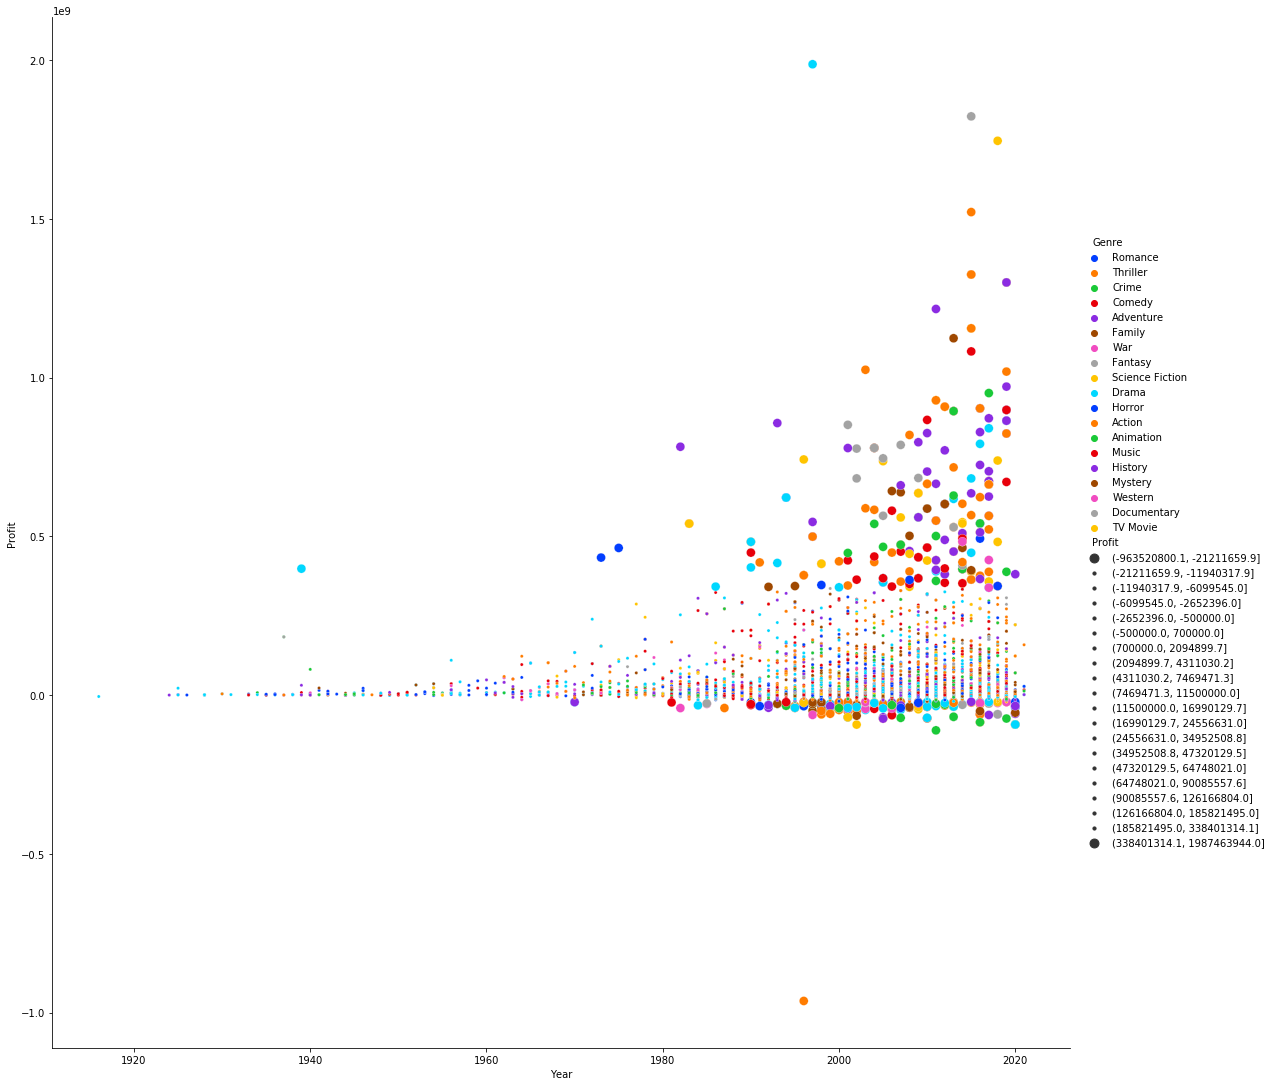

In [19]:
sb.relplot(x=df['Year'],y=df['Profit'],hue=df['Genre'], size = pd.qcut(df["Profit"], 20, precision=1),
                sizes=[80,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,80], palette="bright", height = 15)


### For the remaining categories, there are too many different categories to consider directly. There are over 7000 unique companies, 30+ different countries and languages. 

### To deal with this overload of categorical data, we bin the companies into 4 categories based on their movie count frequency. The top 8 Spoken Languages and Production Countries will be extracted for comparison, the rest will be discarded.

In [20]:
ProComDic ={}
ProCounDic = {}
SpoLangDic = {}
for i in range(len(Movie_CleanedData)):
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCompany[i][j] not in ProComDic: #if genre is not in dictionary, initialize genre: 1
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j])] = 1
        elif Movie_CleanedData.ProductionCompany[i][j] in ProComDic:
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j])] +=1
    for j in range(len(Movie_CleanedData.ProductionCountry[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCountry[i][j] not in ProCounDic: #if genre is not in dictionary, initialize genre: 1
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] = 1
        elif Movie_CleanedData.ProductionCountry[i][j] in ProCounDic:
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] +=1
            
    for j in range(len(Movie_CleanedData.SpokenLanguage[i])): #every element in genrelist
        if Movie_CleanedData.SpokenLanguage[i][j] not in SpoLangDic: #if genre is not in dictionary, initialize genre: 1
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] = 1
        elif Movie_CleanedData.SpokenLanguage[i][j] in SpoLangDic:
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] +=1

In [21]:
k = Counter(SpoLangDic)
l = Counter(ProCounDic)
SpoLangDic = k.most_common(8) 
ProCounDic = l.most_common(8)
TopLang = [x[0] for x in SpoLangDic]
TopCoun = [x[0] for x in ProCounDic]

## Production Company Analysis

In [22]:
others = [x[0] for x in ProComDic.items() if x[1]<=20]
small = [x[0] for x in ProComDic.items() if 20<x[1]<=50]
medium = [x[0] for x in ProComDic.items() if 50<x[1]<=150]
large = [x[0] for x in ProComDic.items() if 150<x[1]]        

In [23]:
for i in range(len(Movie_CleanedData)):
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): #every element in list
        if Movie_CleanedData.ProductionCompany[i][j] in others: 
            Movie_CleanedData.ProductionCompany[i][j] = "Others"
        if Movie_CleanedData.ProductionCompany[i][j] in small: 
            Movie_CleanedData.ProductionCompany[i][j] = "Small"
        if Movie_CleanedData.ProductionCompany[i][j] in medium: 
            Movie_CleanedData.ProductionCompany[i][j] = "Medium"
        if Movie_CleanedData.ProductionCompany[i][j] in large: 
            Movie_CleanedData.ProductionCompany[i][j] = "Large"
            
    for j in range(len(Movie_CleanedData.ProductionCountry[i])):
        if Movie_CleanedData.ProductionCountry[i][j] not in TopCoun:
            Movie_CleanedData.ProductionCountry[i][j] = "Others"
            
    for j in range(len(Movie_CleanedData.SpokenLanguage[i])):
        if Movie_CleanedData.SpokenLanguage[i][j] not in TopLang:
            Movie_CleanedData.SpokenLanguage[i][j] = "Others"
        

In [24]:
ProCom = Movie_CleanedData.ProductionCompany.apply(pd.Series).stack()
ProCom = pd.get_dummies(ProCom).groupby(level=0).sum()
ProCom = ProCom.replace(0,np.nan)
ProCom['Profit'] = Movie_CleanedData.Profit
ProCom['Year'] = Movie_CleanedData.Year
ProCom = ProCom.drop(columns=['Others'])

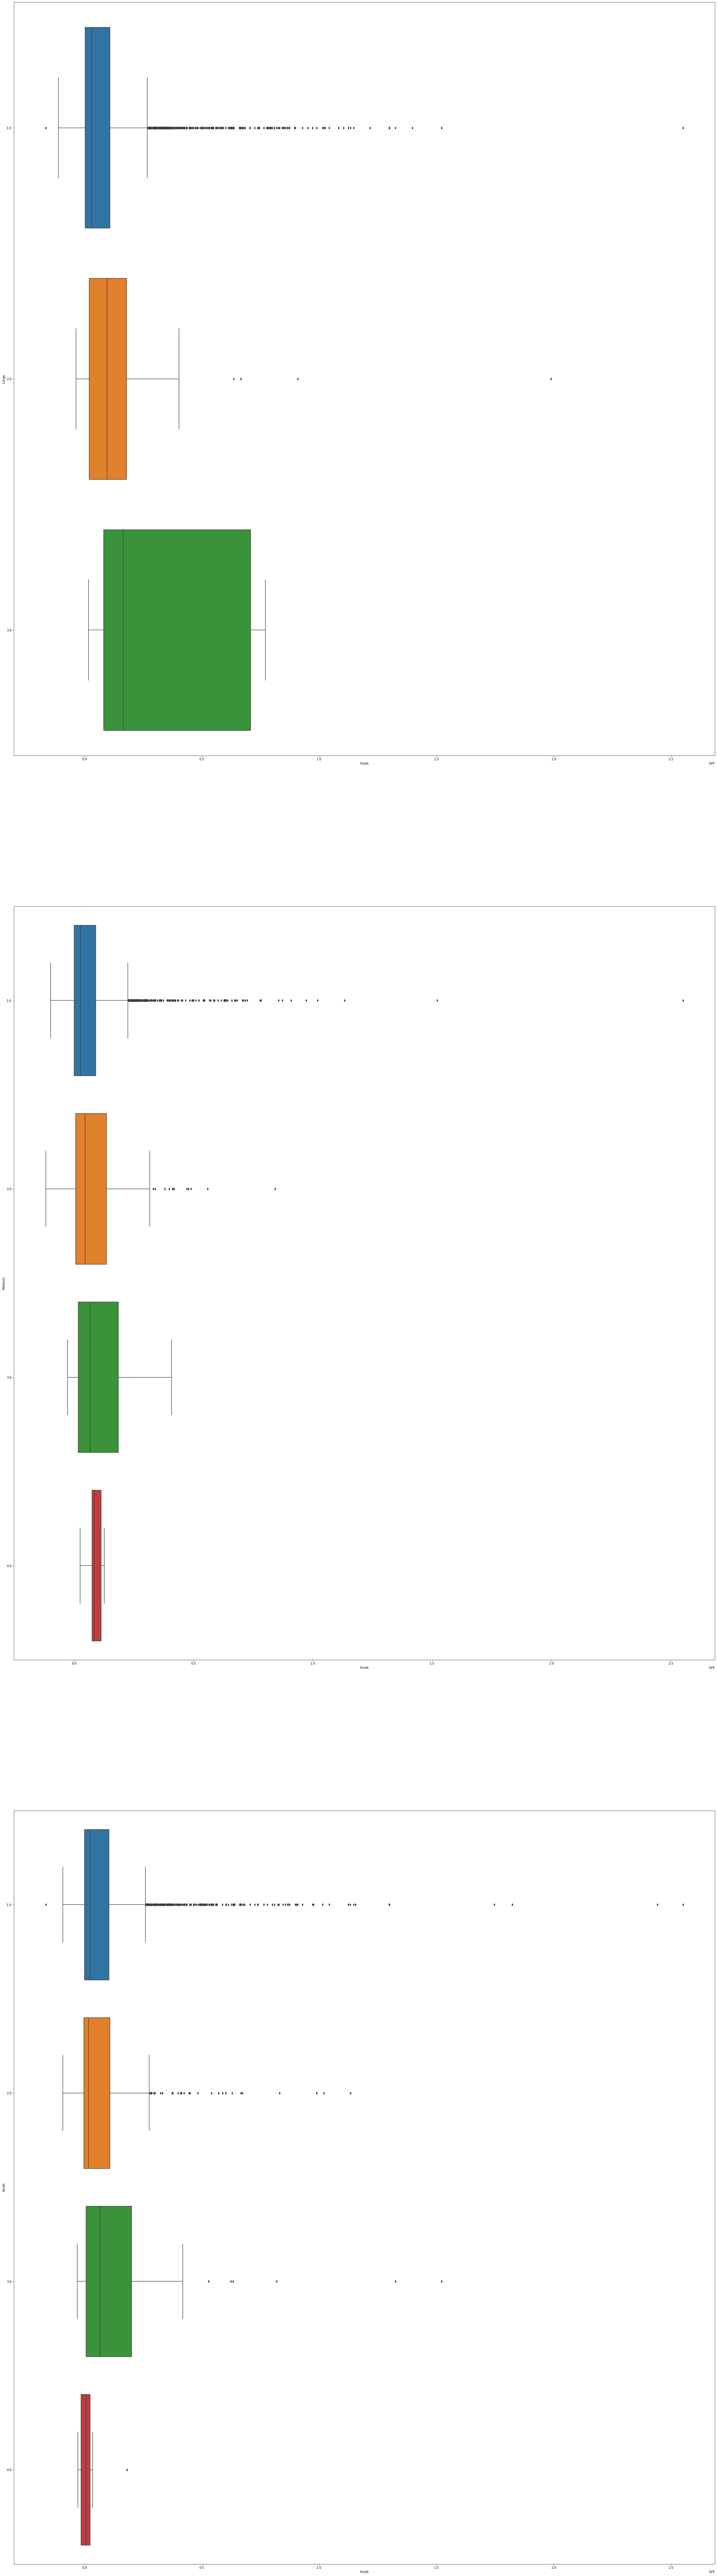

In [25]:
f, axes = plt.subplots(len(ProCom.columns)-2, 1, figsize=(40, 150))
count = 0
for var in ProCom.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = ProCom[var], x = ProCom['Profit'], orient = "h", ax = axes[count])
    count+=1

In [26]:
df2 = ProCom.melt(id_vars=['Year',"Profit"], var_name="ProCom",value_name="Value")
df2 = df2.sample(frac=0.25,axis='rows')

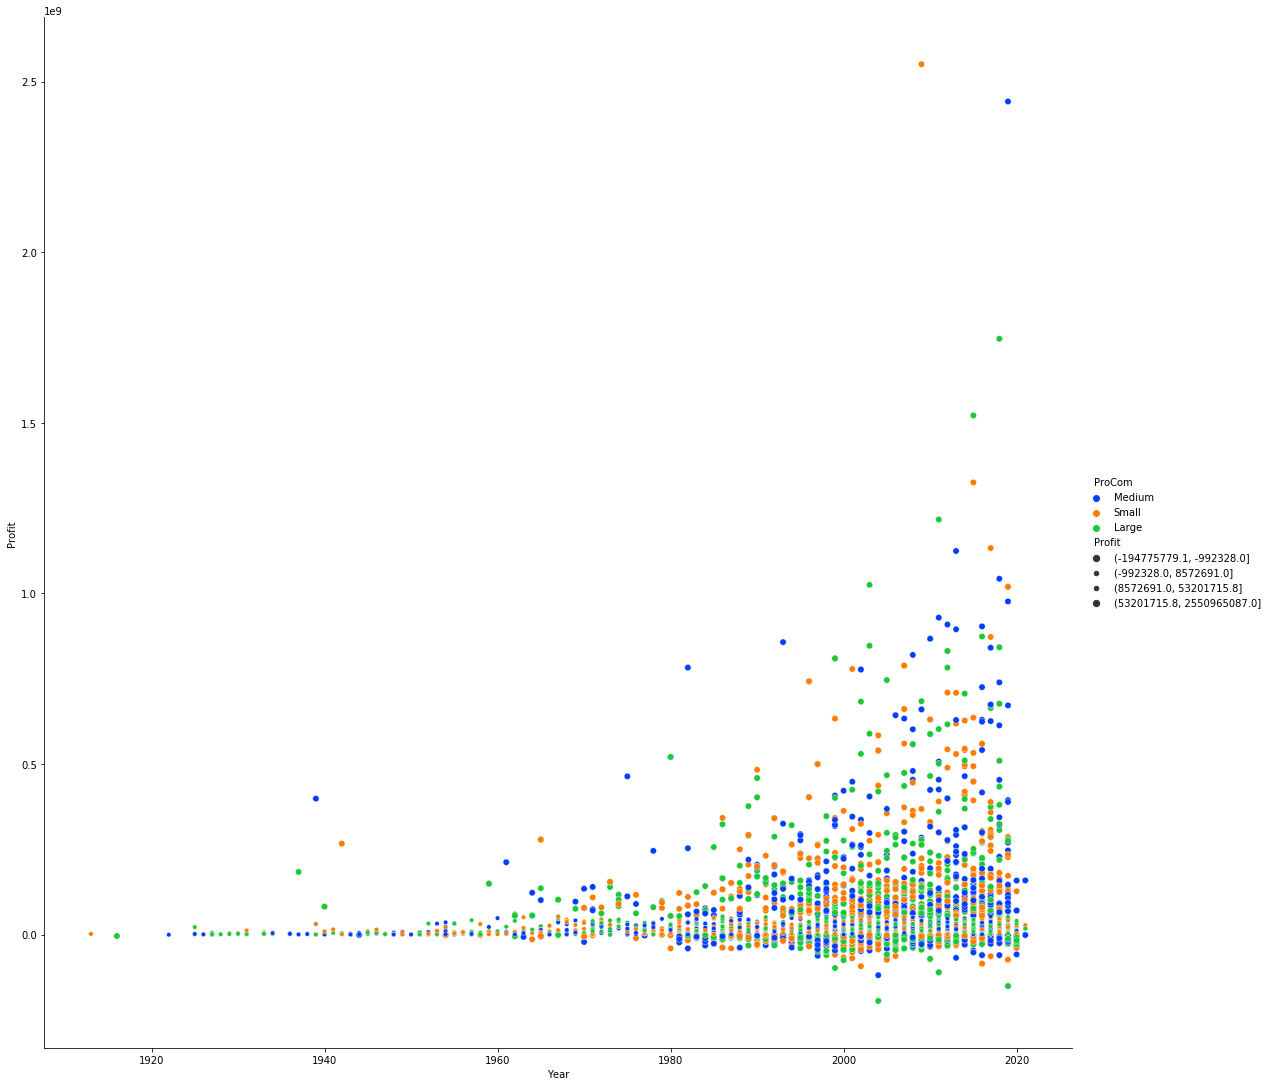

In [27]:
sb.relplot(x=df2['Year'],y=df2['Profit'],hue=df2['ProCom'], size = pd.qcut(df2["Profit"], 4, precision=1),
          sizes=[40,20,20,40],palette="bright", height = 15)


## Production Country Analysis

In [28]:
ProCoun = Movie_CleanedData.ProductionCountry.apply(pd.Series).stack()
ProCoun = pd.get_dummies(ProCoun).groupby(level=0).sum()
ProCoun = ProCoun.replace(0,np.nan)
ProCoun['Profit'] = Movie_CleanedData.Profit
ProCoun['Year'] = Movie_CleanedData.Year
ProCoun = ProCoun.drop(columns=['Others'])
ProCoun.head()

,CA,DE,ES,FR,GB,IN,IT,US,Profit,Year
Movie_name,,,,,,,,,,
#살아있다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7116285,2020
'71,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-7800000,2014
'N Beetje Verliefd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166214,2006
(500) Days of Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,53222734,2009
(T)Raumschiff Surprise - Periode 1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,67341401,2004


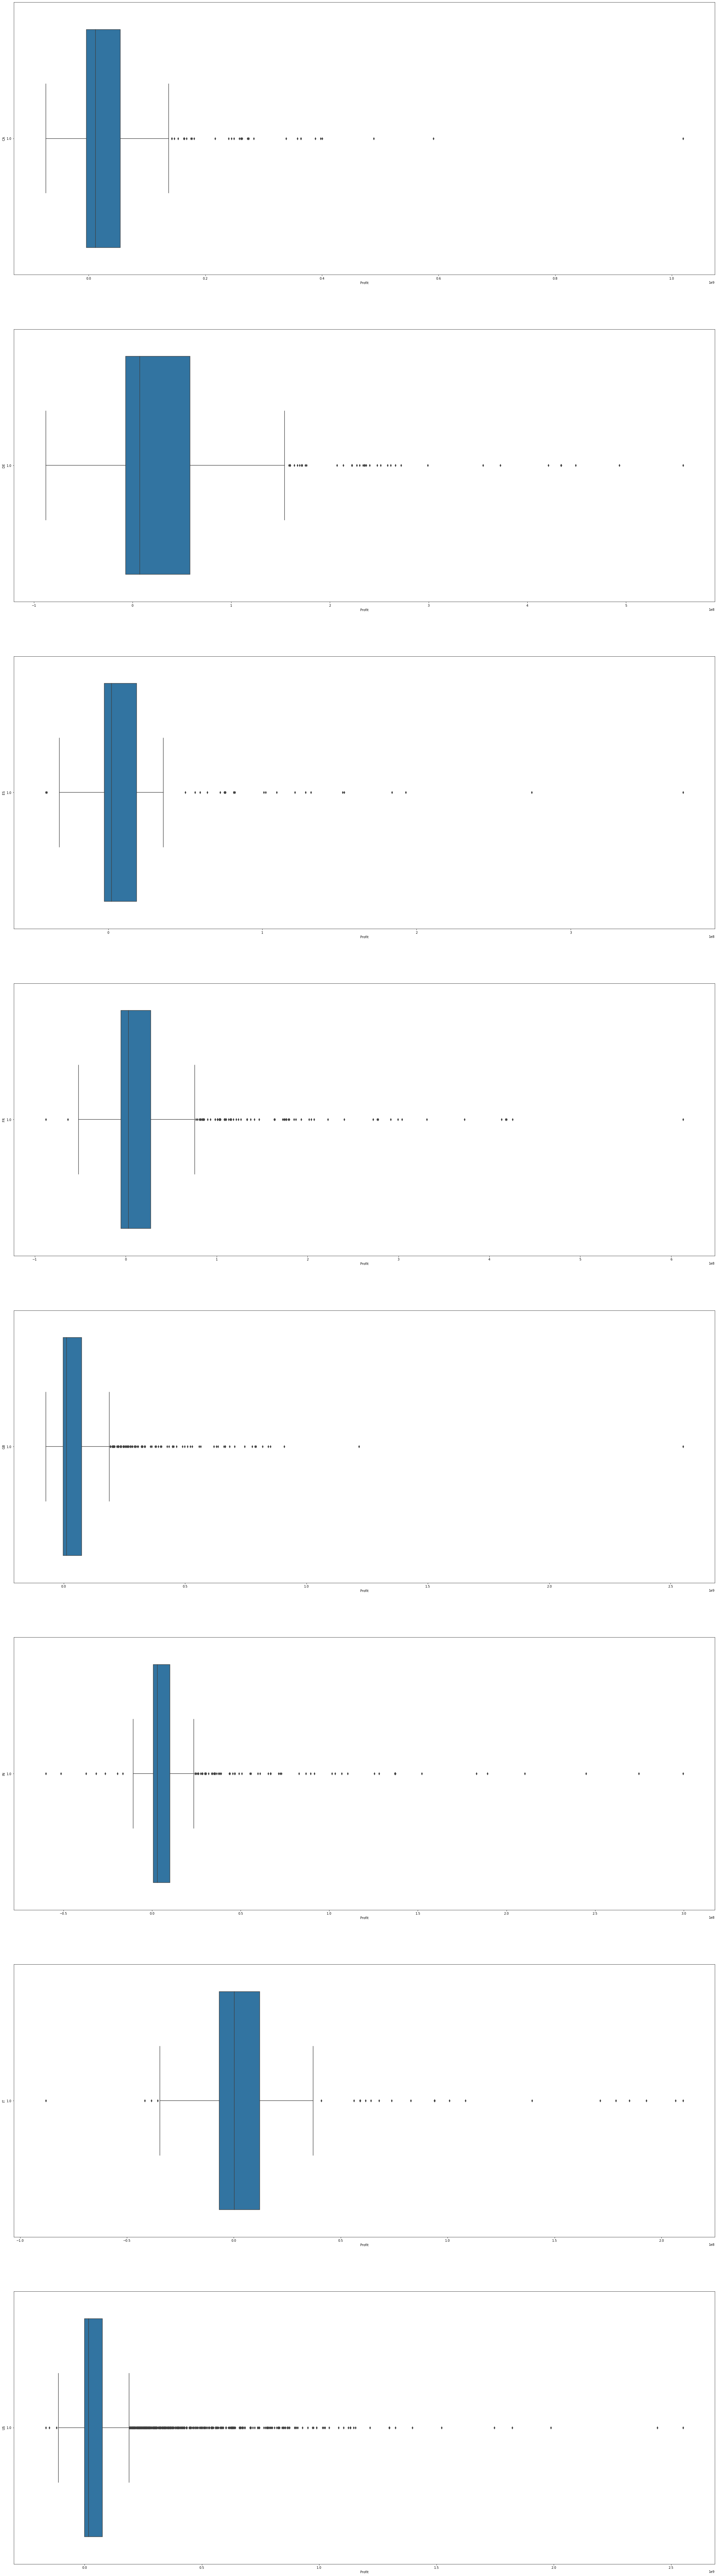

In [29]:
f, axes = plt.subplots(len(ProCoun.columns)-2, 1, figsize=(40, 150))
count = 0
for var in ProCoun.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = ProCoun[var], x = ProCoun['Profit'], orient = "h", ax = axes[count])
    count+=1

In [30]:
df3 = ProCoun.melt(id_vars=['Year',"Profit"], var_name="ProCoun",value_name="Value")
df3 = df3.sample(frac=0.25,axis='rows')

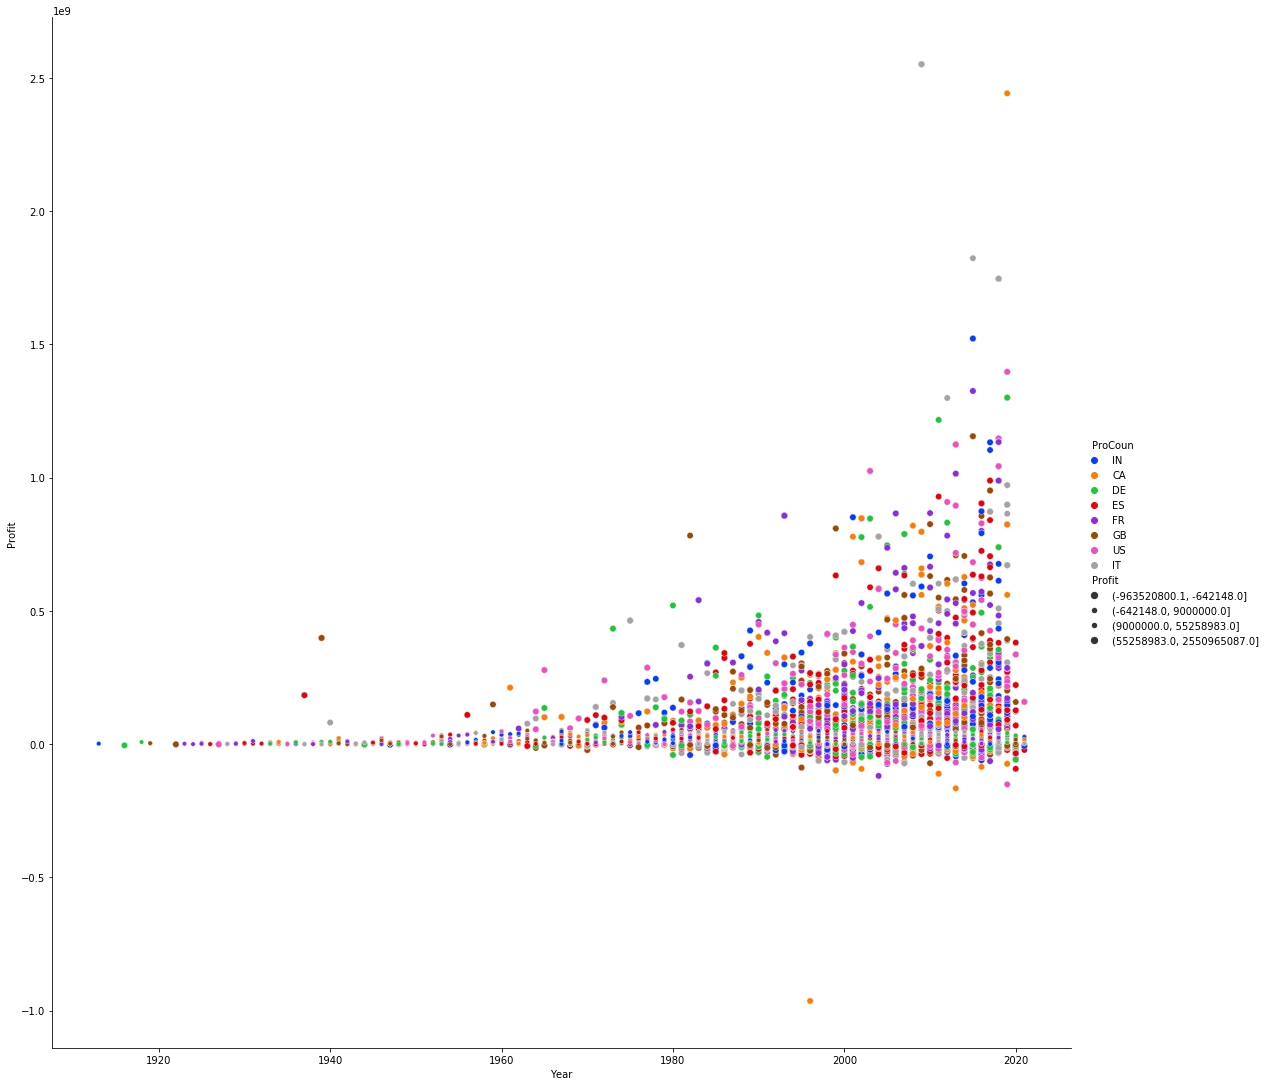

In [31]:
sb.relplot(x=df3['Year'],y=df3['Profit'],hue=df3['ProCoun'], size = pd.qcut(df3["Profit"], 4, precision=1),
          sizes=[40,20,20,40] ,palette="bright", height = 15)

## Spoken Language Analysis

In [32]:
SpoLang = Movie_CleanedData.SpokenLanguage.apply(pd.Series).stack()
SpoLang = pd.get_dummies(SpoLang).groupby(level=0).sum()
SpoLang = SpoLang.replace(0,np.nan)
SpoLang['Profit'] = Movie_CleanedData.Profit
SpoLang['Year'] = Movie_CleanedData.Year
SpoLang = SpoLang.drop(columns=['Others'])
SpoLang.head()

,de,en,es,fr,hi,it,ja,ru,Profit,Year
Movie_name,,,,,,,,,,
#살아있다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7116285,2020
'71,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-7800000,2014
'N Beetje Verliefd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166214,2006
(500) Days of Summer,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,53222734,2009
(T)Raumschiff Surprise - Periode 1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67341401,2004


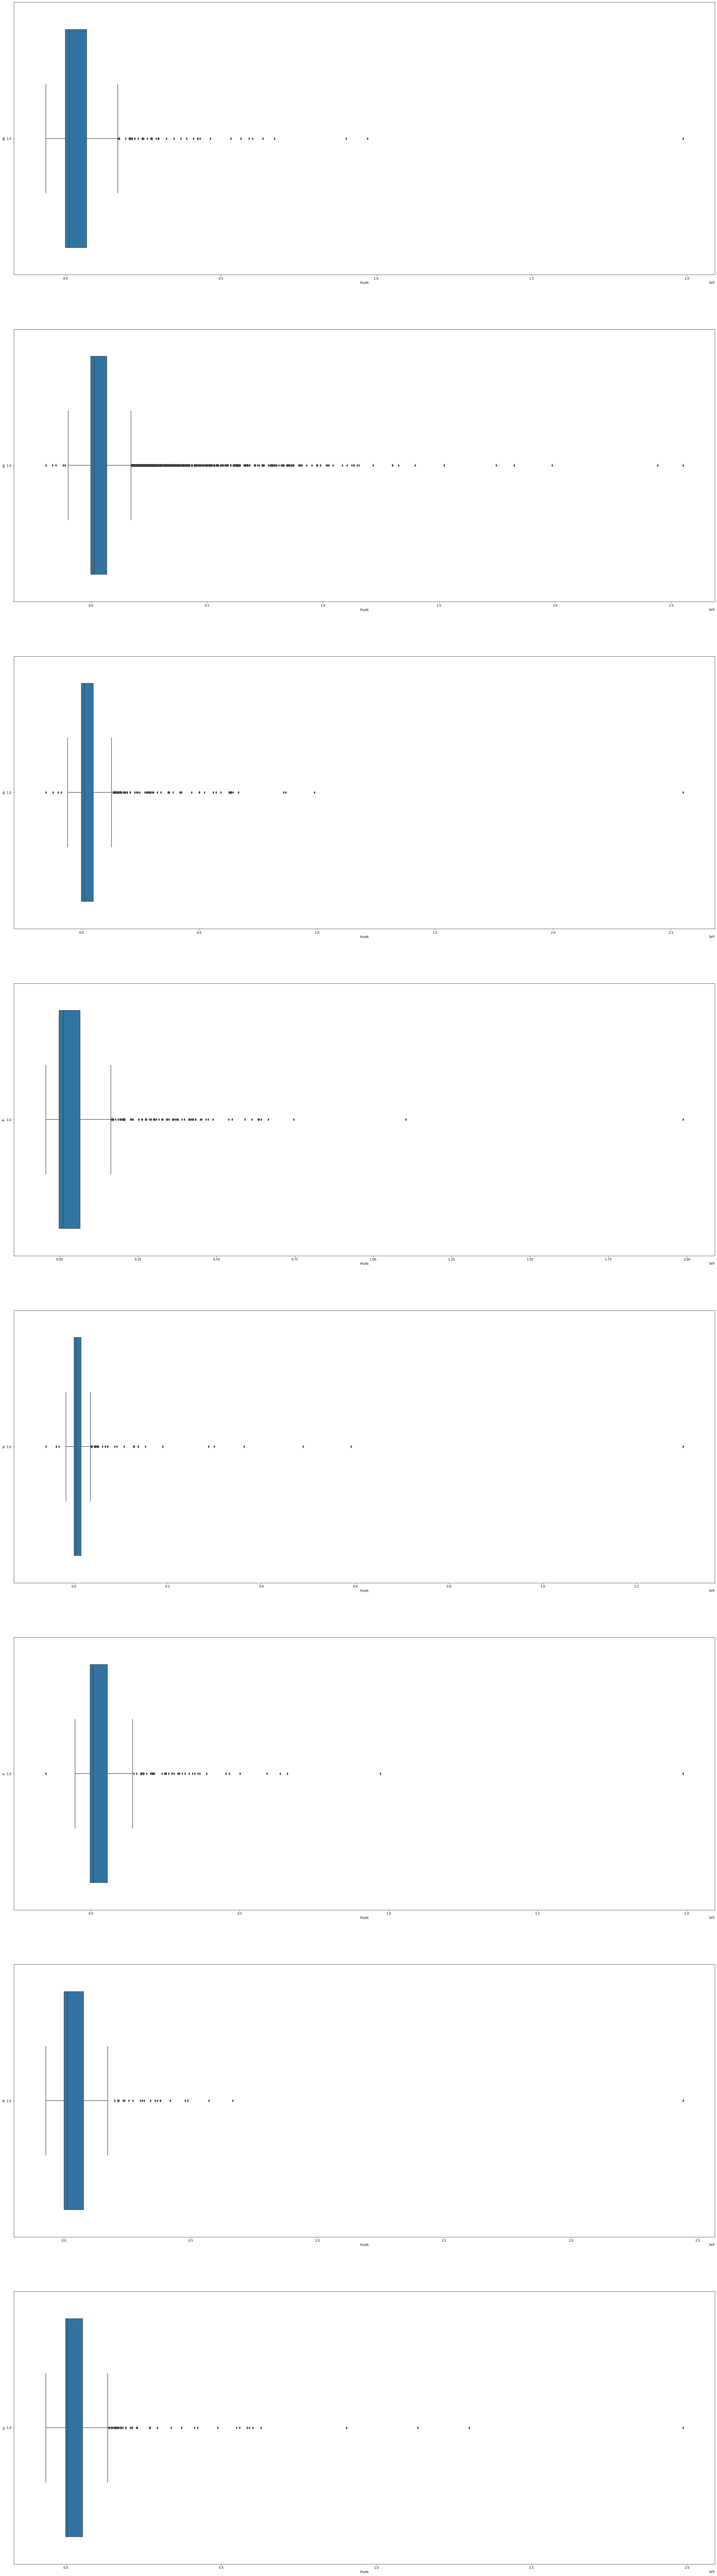

In [33]:
f, axes = plt.subplots(len(SpoLang.columns)-2, 1, figsize=(40, 150))
count = 0
for var in SpoLang.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = SpoLang[var], x = SpoLang['Profit'], orient = "h", ax = axes[count])
    count+=1

In [34]:
df4 = SpoLang.melt(id_vars=['Year',"Profit"], var_name="SpoLang",value_name="Value")
df4 = df4.sample(frac=0.25,axis='rows')

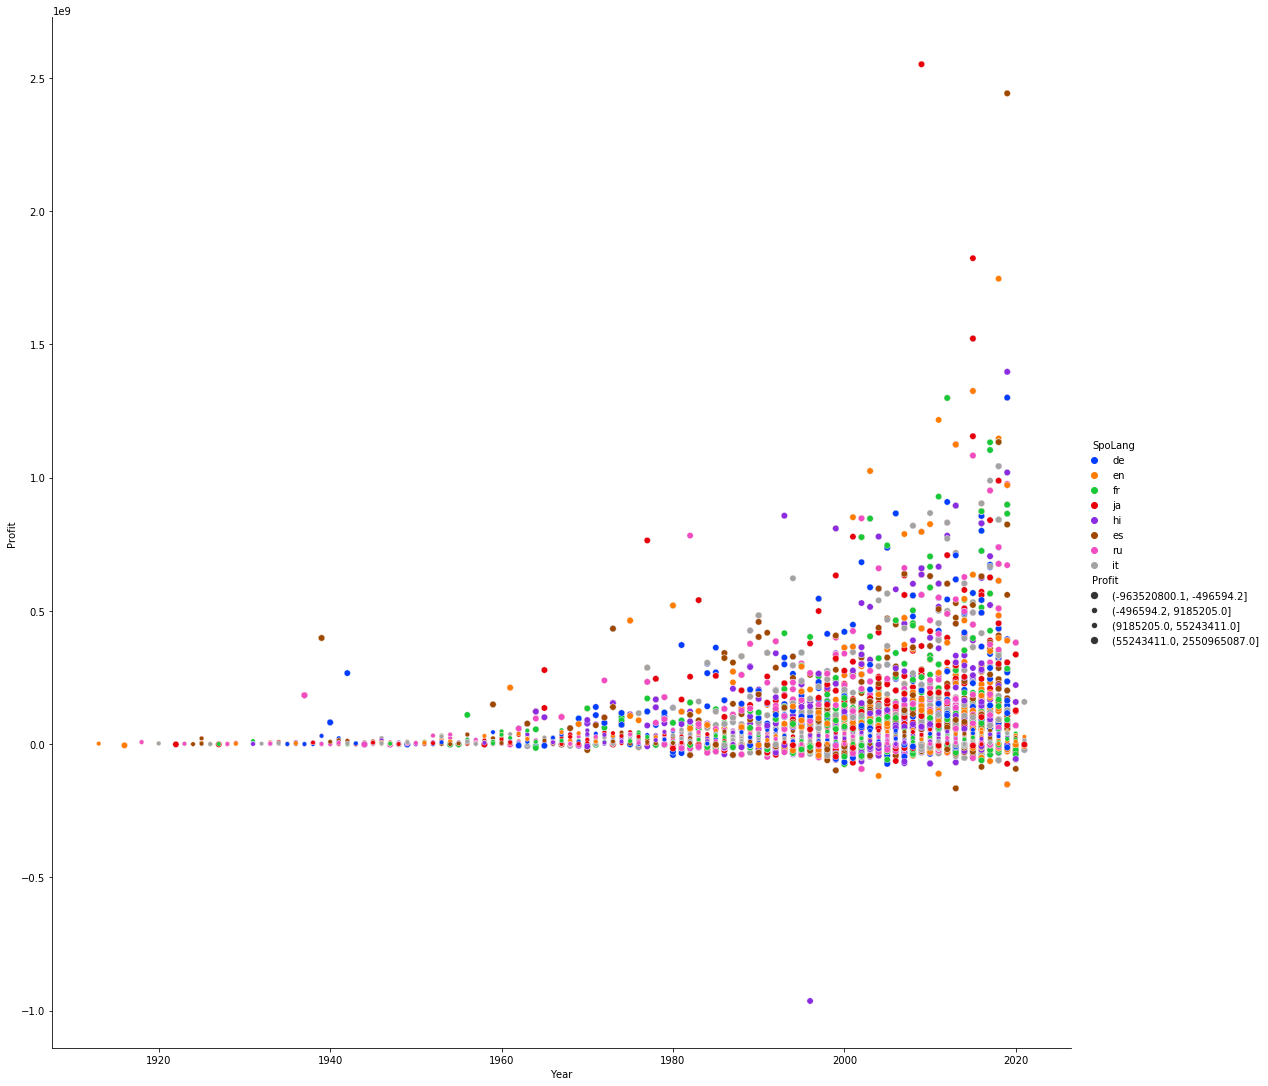

In [35]:
sb.relplot(x=df4['Year'],y=df4['Profit'],hue=df4['SpoLang'], size = pd.qcut(df4["Profit"], 4, precision=1),
           sizes=[40,20,20,40],palette="bright", height = 15)

# Linear Regression on Numeric Data

Response Variable : Profit
    
Predictor Variables : Budget, Popularity, VoteAvg, VoteCount, Revenue, Runtime, Year, Month

In [36]:
# Year, Month

Regression Model :  Total =  𝑎1xBudget + a2xPopularity + a3xVoteAvg + a4xVoteCount + a5xRevenue + a6xRuntime + b 

In [37]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
# Extract Response and Predictors
y = pd.DataFrame(Movie_CleanedData["Profit"])
X = pd.DataFrame(Movie_CleanedData[['Budget', 'Popularity', 'VoteAvg', 'VoteCount', 'Revenue', 'Runtime', 'Year','Month']])

In [39]:
# Splitting the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, Tomcats to Annie Hall
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Budget      5034 non-null   int64  
 1   Popularity  5034 non-null   float64
 2   VoteAvg     5034 non-null   float64
 3   VoteCount   5034 non-null   int64  
 4   Revenue     5034 non-null   int64  
 5   Runtime     5034 non-null   float64
 6   Year        5034 non-null   int64  
 7   Month       5034 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 354.0+ KB


In [41]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [-7.4505806e-08]
Coefficients of Regression 	: a =  [[-1.00000000e+00  4.72760978e-10 -1.47456282e-09  2.10640863e-11
   1.00000000e+00  3.71709951e-11  3.11136283e-11  1.57232634e-10]]


In [43]:
#Printing coefficients against predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

   Predictors  Coefficients
0      Budget -1.000000e+00
1  Popularity  4.727610e-10
2     VoteAvg -1.474563e-09
3   VoteCount  2.106409e-11
4     Revenue  1.000000e+00
5     Runtime  3.717100e-11
6        Year  3.111363e-11
7       Month  1.572326e-10



In [44]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

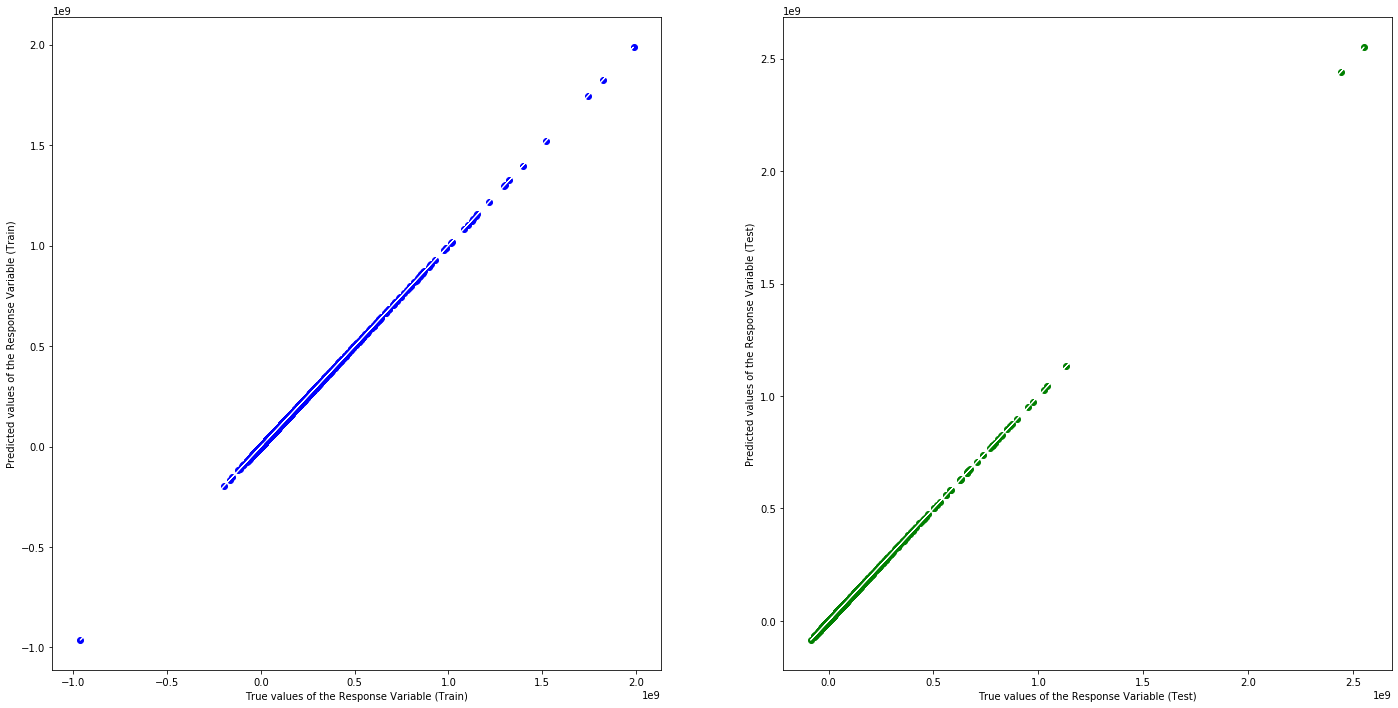

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 4.345144503774781e-15

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 3.0073116551971597e-15




In [45]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

print()

## Preparing Categorical Data for Random Forest

In [46]:
Genre = Movie_CleanedData.GenreList.apply(pd.Series).stack()
Genre = pd.get_dummies(Genre).groupby(level=0).sum()
ProCom = Movie_CleanedData.ProductionCompany.apply(pd.Series).stack()
ProCom = pd.get_dummies(ProCom).groupby(level=0).sum()
ProCoun = Movie_CleanedData.ProductionCountry.apply(pd.Series).stack()
ProCoun = pd.get_dummies(ProCoun).groupby(level=0).sum()
SpoLang = Movie_CleanedData.SpokenLanguage.apply(pd.Series).stack()
SpoLang = pd.get_dummies(SpoLang).groupby(level=0).sum()
ProCom = ProCom.drop(columns=['Others'])
ProCoun = ProCoun.drop(columns=['Others'])
SpoLang = SpoLang.drop(columns=['Others'])
Movie_CleanedData = Movie_CleanedData.drop(columns=['Overview','Tagline','ReleaseDate','OriginalLanguage'])
Movie_CleanedData =pd.concat([Movie_CleanedData, Genre], axis=1)
Movie_CleanedData = pd.concat([Movie_CleanedData, ProCom], axis=1)
Movie_CleanedData = pd.concat([Movie_CleanedData, SpoLang], axis=1)
Movie_CleanedData = pd.concat([Movie_CleanedData, ProCoun], axis=1)
Movie_CleanedData = Movie_CleanedData.drop(columns=['GenreList','ProductionCompany','ProductionCountry','SpokenLanguage'])
Movie_CleanedData = Movie_CleanedData.rename(columns={"de":"Deutschland ","en": "English","es": "Spanish","fr":"French ","hi":"Hindi","it":"Italian","ja":"Japanese","ru":"Russian ","CA":"Canada","DE":"Germany","ES":"Spain","FR":"France","GB":"Britain","IN":"India","IT":"Italy","US":"America"})
Movie_CleanedData['Adult'] = Movie_CleanedData['Adult'].astype(int)
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6712 entries, Avengers: Endgame to Bacalaureat
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adult            6712 non-null   int32  
 1   Budget           6712 non-null   int64  
 2   Popularity       6712 non-null   float64
 3   VoteAvg          6712 non-null   float64
 4   VoteCount        6712 non-null   int64  
 5   Revenue          6712 non-null   int64  
 6   Profit           6712 non-null   int64  
 7   Runtime          6712 non-null   float64
 8   Year             6712 non-null   int64  
 9   Month            6712 non-null   int64  
 10  mean_Avg         1677 non-null   float64
 11  Action           6712 non-null   uint8  
 12  Adventure        6712 non-null   uint8  
 13  Animation        6712 non-null   uint8  
 14  Comedy           6712 non-null   uint8  
 15  Crime            6712 non-null   uint8  
 16  Documentary      6712 non-null   uint8  
 

In [47]:
to change month to categorical

SyntaxError: invalid syntax (<ipython-input-47-1a2925cb9f6e>, line 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
y = pd.DataFrame(Movie_CleanedData["Profit"])
X = Movie_CleanedData.drop(columns=['Profit'])

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
y_train.values.ravel()

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train.values.ravel())
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))

In [ ]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]